# Strategy Optimization and Benchmarking

Question:

Which is better SMA lookback period to use in the signal?

Answer:

Try different SMA lookback periods and compare the performance of the strategy.

In [8]:
import pandas as pd
import bt
import matplotlib.pyplot as plt
import talib

In [4]:
stock_data = pd.read_csv("../../assets/GOOG.csv", index_col='Date', parse_dates=True)

In [5]:
price_data = stock_data[['Close']]

# Conduct a strategy optimization

You have an SMA-based signal strategy to trade stocks. However, you are not sure what lookback period to use for calculating the SMA that can optimize the strategy performance. You plan to run multiple backtests on different input parameters. Also, you want the capability to assess the strategy on trading different stocks or based on different historical periods.

In [6]:
def signal_strategy(price_data, period, name):
    # Calculate SMA
    sma = price_data.rolling(period).mean()
    # Define the signal-based Strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.SelectWhere(price_data>sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

In [7]:
# Create signal strategy backtest
sma10 = signal_strategy(price_data, period=10, name='SMA10')
sma30 = signal_strategy(price_data, period=30, name='SMA30')
sma50 = signal_strategy(price_data, period=50, name='SMA50')

100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


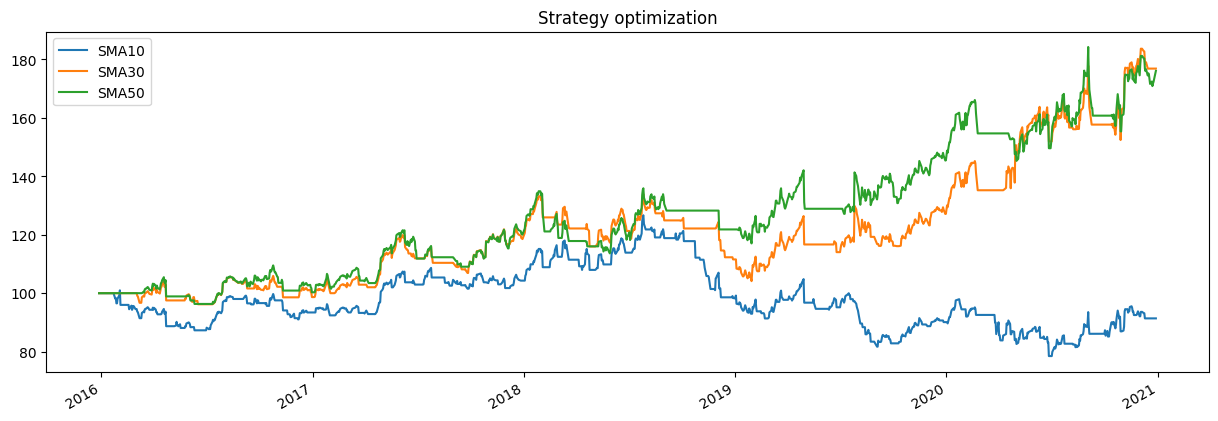

In [9]:
# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50)
bt_results.plot(title='Strategy optimization')
plt.show()

# Perform a strategy benchmarking


You are wondering: instead of spending energy actively trading a stock, what if you just sit back and hold the stock for a period of time. Does your active trading strategy generate better profits than a passive buy-and-hold strategy? To answer this question, you plan to perform a benchmarking test.

In [12]:
def buy_and_hold(price_data, name):
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

In [13]:
# Create benchmark strategy backtest
buy_and_hold = buy_and_hold(price_data, name='benchmark')


100%|██████████| 4/4 [00:00<00:00, 113.26it/s]


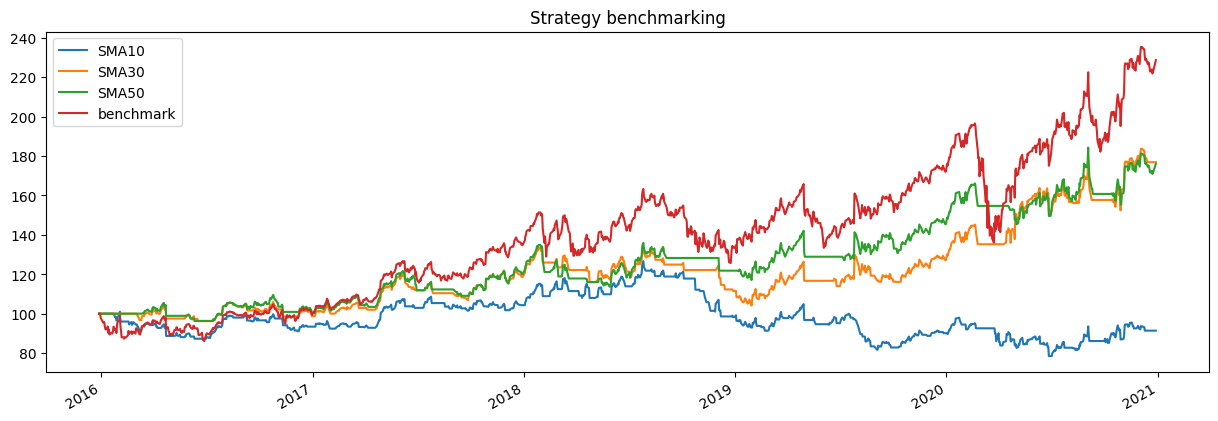

In [14]:
# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50, buy_and_hold)
bt_results.plot(title='Strategy benchmarking')
plt.show()